In [7]:
import torch
import matplotlib.pyplot as plt

$x = \Theta^T\beta  + \epsilon$ where $\Theta = [\theta_1,..., \theta_d, 1] \in R^{d+1}$, $\theta\in R^d$,$x\in R^p$, $\epsilon \sim N(0, \Sigma_\epsilon)$, $\beta \in R^{(d+1)\times p}$

In [2]:
p = 1
d = 1
nu = 2
Psi = torch.eye(d)
Sigma_epsilon = torch.inverse(torch.distributions.Wishart(nu,torch.inverse(Psi)).sample())
print(Sigma_epsilon)

tensor([[0.9646]])


c:\users\ea264728\pycharmprojects\sbi\venv\lib\site-packages\torch\distributions\wishart.py:231: UserWarning: Singular sample detected.
  warnings.warn("Singular sample detected.")


In [3]:
#Sample from matrix normal

def sample_matrix_normal(m, U, V, num_samples):
    Z = torch.randn(num_samples, U.shape[0], V.shape[0])
    return m + torch.cholesky(U)@Z@torch.cholesky(V)

Beta_0 = torch.zeros(d+1,p)
Gamma_0 = torch.eye(d+1)
Beta = sample_matrix_normal(Beta_0,torch.inverse(Gamma_0),Sigma_epsilon,1).squeeze(0)
print(Beta)

tensor([[-0.6976],
        [-1.5697]])


C:\Users\EA264728\AppData\Local\Temp\ipykernel_9812\719820973.py:5: UserWarning: torch.cholesky is deprecated in favor of torch.linalg.cholesky and will be removed in a future PyTorch release.
L = torch.cholesky(A)
should be replaced with
L = torch.linalg.cholesky(A)
and
U = torch.cholesky(A, upper=True)
should be replaced with
U = torch.linalg.cholesky(A).mH().
This transform will produce equivalent results for all valid (symmetric positive definite) inputs. (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\BatchLinearAlgebra.cpp:1337.)
  return m + torch.cholesky(U)@Z@torch.cholesky(V)


In [4]:
N = 10000
theta = torch.randn(N,d)
Theta = torch.cat([theta, torch.ones(N).unsqueeze(-1)], dim = -1)
epsilon = torch.distributions.MultivariateNormal(torch.zeros(d), Sigma_epsilon).sample([N])
X = Theta@Beta + epsilon
print(X.shape)

torch.Size([10000, 1])


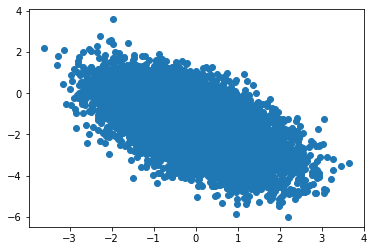

In [5]:
plt.scatter(theta[:,0].numpy(), X[:,0].numpy())

In [6]:
#posterior parameters computation
Beta_hat = torch.inverse(Theta.T@Theta)@Theta.T@X
print(Beta_hat)
Gamma_0 = torch.eye(d+1)
Gamma_N = Theta.T@Theta + Gamma_0
Beta_0 = m
Beta_N = torch.inverse(Theta.T@Theta + Gamma_0)@(Theta.T@Theta@Beta_hat+Gamma_0@Beta_0)
nu_N = nu + N
Psi_N= Psi + (X-Theta@Beta_N).T@(X-Theta@Beta_N) + (Beta_N -Beta_0).T@Gamma_0@(Beta_N - Beta_0)

tensor([[-0.7016],
        [-1.5822]])


NameError: name 'm' is not defined

In [ ]:
sample_Sigma_epsilon = torch.inverse(torch.distributions.Wishart(nu_N, torch.inverse(Psi_N)).sample())
print(sample_Sigma_epsilon)
sample_Beta = sample_matrix_normal(Beta_N, torch.inverse(Gamma_N), sample_Sigma_epsilon,1)
print(sample_Beta)